In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew, kurtosis
from scipy.special import boxcox1p

# Import Data

In [16]:
train = pd.read_csv('/Users/Jeremy/Desktop/Kaggle/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/Users/Jeremy/Desktop/Kaggle/house-prices-advanced-regression-techniques/test.csv')
sample_submission = pd.read_csv('/Users/Jeremy/Desktop/Kaggle/house-prices-advanced-regression-techniques/sample_submission.csv')

Goal: Predict Saleprices based on features provided

# Data Exploration

In [17]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [18]:
test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [19]:
train.shape

(1460, 81)

In [20]:
test.shape

(1459, 80)

In [21]:
test_ID = test['Id']

In [22]:
train.drop('Id', axis = 1, inplace = True)
test.drop('Id', axis = 1, inplace = True)

In [23]:
print(train.shape)
print(test.shape)

(1460, 80)
(1459, 79)


# Outlier removal for GrLivArea

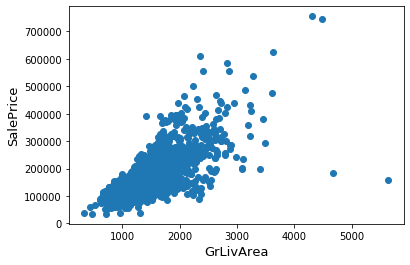

In [24]:
plt.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.xlabel('GrLivArea', fontsize = 13)
plt.ylabel('SalePrice', fontsize = 13)
plt.show()

In [25]:
train = train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)].index)

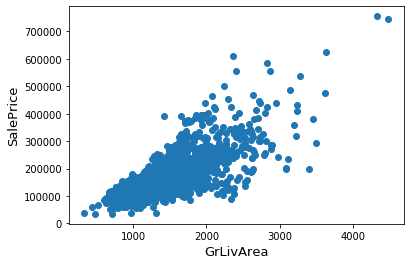

In [26]:
plt.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.xlabel('GrLivArea', fontsize = 13)
plt.ylabel('SalePrice', fontsize = 13)
plt.show()

# Distribution of SalePrice 

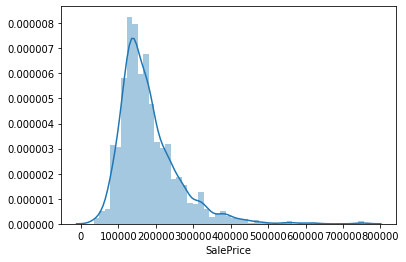

Skewness of SalePrice is: 1.8793604459195012
Kurtosis of SalePrice is: 6.496606038358726


In [27]:
sns.distplot(train['SalePrice'])
plt.show()
print('Skewness of SalePrice is:', skew(train['SalePrice']))
print('Kurtosis of SalePrice is:', kurtosis(train['SalePrice']))

In [28]:
#We use the numpy function log1p which applies log(1+x) to all elements of column n. 
train['SalePrice'] = np.log1p(train['SalePrice'])
sns.histplot(train['SalePrice'])

AttributeError: module 'seaborn' has no attribute 'histplot'

# Feature Engineering

In [29]:
n_train = train.shape[0]
n_test = test.shape[0]
print(n_train)
print(n_test)

1458
1459


In [30]:
y_train = train.SalePrice.values
y_train

array([12.24769912, 12.10901644, 12.31717117, ..., 12.49313327,
       11.86446927, 11.90159023])

In [31]:
all_data = pd.concat([train, test]).reset_index(drop = True)
all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2913,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2914,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2915,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [ ]:
all_data.drop('SalePrice', axis = 1, inplace = True)

In [ ]:
print('Shape of all_data is:', all_data.shape)

# Handle Missing Data

In [ ]:
all_data_na = all_data.isnull().mean().mul(100).sort_values(ascending = False)
all_data_na

In [ ]:
all_data_na.drop(all_data_na[all_data_na == 0].index, inplace = True)

In [ ]:
missing_data = pd.DataFrame({'Missing Percentage': all_data_na})
missing_data

In [ ]:
plt.figure(figsize = (30,20))
sns.barplot(x = all_data_na.index[:20], y = all_data_na[:20])
plt.show()

plt.figure(figsize = (15,12))
data_corr = train.corr()
sns.clustermap(data_corr, cmap = 'YlGnBu')

# Impute Missing Values

In data description, it says that NaN means "No Pool". This makes sense, given a huge ratio of missing values. (>= 99.50% of houses do not have pools)

In [ ]:
all_data['PoolQC'] = all_data['PoolQC'].fillna('None')

In [ ]:
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('None')

In [ ]:
all_data['Alley'] = all_data['Alley'].fillna('None')

In [ ]:
all_data['Fence'] = all_data['Fence'].fillna('None')

In [ ]:
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna('None')

In [ ]:
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [ ]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [ ]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [ ]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [ ]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna(0)

In [ ]:
all_data['MasVnrType'] = all_data['MasVnrType'].fillna('None')
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0)

In [ ]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [ ]:
all_data = all_data.drop('Utilities', axis = 1)

In [ ]:
all_data['Functional'] = all_data['Functional'].fillna('Typ')

In [ ]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [ ]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [ ]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [ ]:
all_data.isnull().sum().sort_values(ascending = False)

# More Feature Engineering

In [ ]:
all_data['MSSubClass']

In [ ]:
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply labelencoder to categorical variables
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c] = lbl.transform(list(all_data[c].values))
# shape of all data after transformation
print('Shape of all of the data is:', all_data.shape)

In [ ]:
# We also add the feature of total sqfootage 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [ ]:
numeric_cols = all_data.dtypes[all_data.dtypes != 'object'].index
#skewed_feats is a panda series
skewed_feats = all_data[numeric_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewness = pd.DataFrame({'skewness': skewed_feats})
skewness.head(10)

In [ ]:
skewness = skewness[abs(skewness) > 0.75]
print('There are {} numerical features to Box Cox transform.'.format(skewness.shape[0]))

In [ ]:
from scipy.special import boxcox1p
skewed_features = skewness.index
lamda = 0.15
for feature in skewed_features:
    all_data[feature] = boxcox1p(all_data[feature], lamda)

In [ ]:
all_data = pd.get_dummies(all_data)
all_data.shape

In [ ]:
X_train = all_data[:n_train]
X_test = all_data[n_train:]

In [ ]:
X_train

In [ ]:
X_train.isnull().sum()

# Modelling

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge, BayesianRidge, LassoLarsIC, LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [ ]:
lasso = make_pipeline(RobustScaler(),Lasso(alpha =0.0005, random_state=1))
#lasso_results = -cross_val_score(lasso, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)
#print(lasso_results)

In [ ]:
-cross_val_score(lasso, X_train, y_train, cv = 5, scoring = 'neg_root_mean_squared_error')

In [ ]:
lasso.fit(X_train, y_train)

In [ ]:
lasso_pred = np.expm1(lasso.predict(X_test))

In [ ]:
lasso_pred

In [ ]:
linear = make_pipeline(RobustScaler(), LinearRegression())
-cross_val_score(linear, X_train, y_train, cv = 5, scoring = 'neg_root_mean_squared_error')

In [ ]:
linear.fit(X_train, y_train)
linear_pred = np.expm1(linear.predict(X_test))
linear_pred

In [ ]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_train, y_train, test_size = 0.3, random_state = 42)
model_ridge = make_pipeline(RobustScaler(), Ridge(alpha = 0.2))

In [ ]:
model_ridge.fit(X_1_train, y_1_train)
ridge_pred = model_ridge.predict(X_1_test)
print(mean_squared_error(ridge_pred, y_1_test))

In [ ]:
np.expm1(model_ridge.predict(X_test))